# Exploratory Data Analysis on Spotify Dataset

## Introduction
The dataset used in this study was compiled from Spotify’s Web API through two Python-based data collection scripts designed to retrieve both popular and non-popular songs, along with their corresponding descriptive and audio features. The descriptive features encompass contextual information about each track, including the artist name, album title, and release date. In contrast, the audio features, derived from Spotify’s proprietary audio analysis, quantify various musical characteristics such as key, valence, danceability, and energy.

The integration of these feature categories provides a comprehensive foundation for the ensuing exploratory data analysis, which aims to examine patterns and relationships that distinguish popular songs from non-popular ones.

Let's go ahead and import some python libraries that we will be using to perform this EDA

## Import Libraries

In [1111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

## Loading the dataset

In [1112]:
df = pd.read_csv('archive/high_popularity_spotify_data.csv')
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])
df.head().T

Number of rows in the dataset: 1686
Number of columns in the dataset: 29


,0,1,2,3,4
energy,0.592,0.507,0.808,0.91,0.783
tempo,157.969,104.978,108.548,112.966,149.027
danceability,0.521,0.747,0.554,0.67,0.777
playlist_genre,pop,pop,pop,pop,pop
loudness,-7.777,-10.171,-4.169,-4.07,-4.477
liveness,0.122,0.117,0.159,0.304,0.355
valence,0.535,0.438,0.372,0.786,0.939
track_artist,"Lady Gaga, Bruno Mars",Billie Eilish,Gracie Abrams,Sabrina Carpenter,"ROSÉ, Bruno Mars"
time_signature,3,4,4,4,4
speechiness,0.0304,0.0358,0.0368,0.0634,0.26


## Data statistics

In [1113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [1114]:
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


The dataset comprises 1,686 observations and 29 variables, collected via Spotify’s Web API. It integrates both audio features derived from Spotify’s signal analysis algorithms and descriptive attributes that provide contextual information about each track.

The audio features (e.g., energy, tempo, danceability, loudness, liveness, valence, speechiness, instrumentalness, acousticness, mode, key, and time_signature) are continuous or categorical numerical variables describing the sonic and rhythmic properties of each song. The descriptive features include textual and categorical data such as track_name, artist_name, album_name, release_date, playlist_name, and playlist_genre, which together capture contextual and organizational metadata.

The target variable for subsequent analysis is **track_popularity**, which is a numerical measure ranging from 0 to 100 that reflects Spotify’s popularity index for each track.

This dataset therefore offers a well-structured foundation for exploratory data analysis aimed at examining how both musical and contextual characteristics differentiate popular songs from less popular ones.

## Data Exploration Plan

This exploratory data plan outlines a systematic approach for analyzing the dataset to extract meaningful insights about the relationship between musical features and song popularity. The exploration will proceed through a series of structured stages designed to ensure both analytical rigor and interpretability.

1. **Preliminary Examination**:

Begin by reviewing the dataset’s structure, data types, and completeness. Verify the number of observations and variables, check for duplicate records based on track_id, and assess missing values. Any detected issues will be addressed through removal or imputation as appropriate.

2. **Data Cleaning and Preparation**:

Clean and preprocess the dataset to ensure analytical consistency. This will include converting data types (e.g., ensuring track_popularity is numeric and track_album_release_date is in datetime format).

3. **Feature Engineering**:

Introduce derived features to enhance interpretability and potential predictive power. Examples include:
- A temporal variable representing song age derived from the release date.
- Encoded categorical variables (e.g., playlist_genre) for statistical and modeling purposes.

4. **Descriptive and Univariate Analysis**:

Compute descriptive statistics for numerical features such as energy, tempo, danceability, valence, and loudness to examine their central tendencies and dispersion. Visualize distributions using histograms and boxplots to identify skewness, outliers, and potential anomalies in the data.

5. **Correlation and Multivariate Analysis**:

Assess relationships among numerical features and between these features and track_popularity. A correlation matrix and heatmap will be generated to identify potential multicollinearity and highlight key audio attributes that may influence popularity.

6. **Categorical Feature Exploration**:

Analyze categorical variables such as playlist_genre and artist_name to determine how contextual attributes relate to popularity. In addition, correlation analysis will also be carried out

8. **Hypothesis Formulation**:

Based on insights from the exploratory data analysis, several hypotheses are formulated to examine the relationships between musical and contextual factors and their influence on track popularity.

9. **Hypothesis Testing and Significance Analysis**:

Conduct statistical tests to validate or refute the formulated hypotheses.
- Use independent samples t-tests to compare mean feature values between popular and non-popular songs, applying Mann–Whitney U tests for non-normally distributed variables.
- Apply Pearson or Spearman correlation tests to examine relationships between continuous features and track_popularity.
- Adopt a 5% significance level (alpha = 0.05) to determine whether observed relationships are statistically significant.
The resulting p-values and test statistics will be interpreted to assess the strength and direction of each relationship.

10. **Conclusion and Next Steps**:

The results of the exploratory and inferential analyses will be synthesized into actionable insights. Statistically significant features will be identified as potential predictors for subsequent modeling and forecasting stages, forming the foundation for the project’s analytical conclusions.

Through these steps, the data exploration will establish a strong empirical foundation for the subsequent stages of analysis, including hypothesis formulation, statistical testing, and predictive modeling.

## Preliminary Examination
### Checking For NaN values

In [1115]:
df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

In [1116]:
df[df['track_album_name'].isnull()].T

,665
energy,0.926
tempo,105.969
danceability,0.682
playlist_genre,k-pop
loudness,-2.515
liveness,0.19
valence,0.86
track_artist,NAYEON
time_signature,4
speechiness,0.0607


Among all variables, only one missing value was identified in the track_album_name column, indicating a nearly complete dataset. Let's drop this row and confirm that it has been dropped:

In [1117]:
df.dropna(subset=['track_album_name'], inplace=True)
df.isnull().sum().sum()

0

### Duplicates

In [1118]:
duplicate = df[df.duplicated(['track_id'])]
print(f'There are {duplicate.shape[0]} duplicate rows with the same track_id.')

There are 249 duplicate rows with the same track_id.


In [1119]:
print(f'There are {duplicate["track_name"].unique().size} unique duplicate tracks')

There are 211 unique duplicate tracks


As we can see, there are 221 unique duplicate rows in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.

In [1120]:
dup_removed = df.drop_duplicates()
dup_removed 

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


Let's check if we correctly removed them and check again that track_ids are unique:

In [1121]:
print(f'We have correctly removed all duplicates: {dup_removed.shape[0] == df.shape[0] - df.duplicated().sum()}')
print(dup_removed.index.is_unique)

We have correctly removed all duplicates: True
True


## Data Cleaning & Preparation

### Remove junk columns

In [1122]:
junk_columns = ['track_href', 'uri', 'id', 'track_album_id', 'analysis_url', 'playlist_id', 'type', 'playlist_name', 'playlist_subgenre']
dup_removed.drop(columns=junk_columns, inplace=True)
dup_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1685
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1685 non-null   float64
 1   tempo                     1685 non-null   float64
 2   danceability              1685 non-null   float64
 3   playlist_genre            1685 non-null   object 
 4   loudness                  1685 non-null   float64
 5   liveness                  1685 non-null   float64
 6   valence                   1685 non-null   float64
 7   track_artist              1685 non-null   object 
 8   time_signature            1685 non-null   int64  
 9   speechiness               1685 non-null   float64
 10  track_popularity          1685 non-null   int64  
 11  track_album_name          1685 non-null   object 
 12  track_id                  1685 non-null   object 
 13  track_name                1685 non-null   object 
 14  track_album_r

We can see that track_album_release_date is not correctly formatted, let's convert it to date_time:

In [1123]:
dup_removed["track_album_release_date"] = pd.to_datetime(dup_removed["track_album_release_date"], errors="coerce", infer_datetime_format=True)
prepped_df = dup_removed.copy()
prepped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1685
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   energy                    1685 non-null   float64       
 1   tempo                     1685 non-null   float64       
 2   danceability              1685 non-null   float64       
 3   playlist_genre            1685 non-null   object        
 4   loudness                  1685 non-null   float64       
 5   liveness                  1685 non-null   float64       
 6   valence                   1685 non-null   float64       
 7   track_artist              1685 non-null   object        
 8   time_signature            1685 non-null   int64         
 9   speechiness               1685 non-null   float64       
 10  track_popularity          1685 non-null   int64         
 11  track_album_name          1685 non-null   object        
 12  track_id                 

/var/folders/n1/k6wd8lyx2b76lr9n8ln2vjch0000gn/T/ipykernel_27474/1650737188.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dup_removed["track_album_release_date"] = pd.to_datetime(dup_removed["track_album_release_date"], errors="coerce", infer_datetime_format=True)


## Feature Engineering

In [1124]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# --- 1) Derive song age (in years) from release date ---

prepped_df["track_album_release_date"] = pd.to_datetime(prepped_df["track_album_release_date"], errors="coerce")
current_year = datetime.now().year
prepped_df["song_age"] = current_year - prepped_df["track_album_release_date"].dt.year

# --- 2) Encode categorical variables (genre, track_artist, etc.) ---
# For artists
# Split multiple artists into lists for MultiLabelBinarizer
prepped_df["track_artist_list"] = prepped_df["track_artist"].str.split(",").apply(
    lambda x: ["track_artist_" + a.strip() for a in x]  # add prefix here
)

mlb = MultiLabelBinarizer()
artist_dummies = pd.DataFrame(
    mlb.fit_transform(prepped_df["track_artist_list"]),
    columns=mlb.classes_,
    index=prepped_df.index
)

# Concatenate encoded features with the original DataFrame
df_encoded = pd.concat([prepped_df.drop(columns=["track_artist_list", "track_artist"]), artist_dummies], axis=1)

# For playlist_genre
df_encoded = pd.get_dummies(df_encoded, columns=["playlist_genre"], drop_first=True)

# --- 3) Extract additional interpretable temporal features ---

df_encoded["release_year"] = df_encoded["track_album_release_date"].dt.year
df_encoded["release_month"] = df_encoded["track_album_release_date"].dt.month

# --- Final check ---
df_encoded[["track_album_release_date", "song_age", "release_year", "release_month"]].head()

,track_album_release_date,song_age,release_year,release_month
0,2024-08-16,1.0,2024.0,8.0
1,2024-05-17,1.0,2024.0,5.0
2,2024-10-18,1.0,2024.0,10.0
3,2024-08-23,1.0,2024.0,8.0
4,2024-10-18,1.0,2024.0,10.0


In [1125]:
print(f'There are {df_encoded.columns.size} columns in the encoded DataFrame.')

There are 1205 columns in the encoded DataFrame.


In [1126]:
df_encoded.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
       'time_signature', 'speechiness', 'track_popularity', 'track_album_name',
       ...
       'playlist_genre_pop', 'playlist_genre_punk', 'playlist_genre_r&b',
       'playlist_genre_reggae', 'playlist_genre_rock', 'playlist_genre_soul',
       'playlist_genre_turkish', 'playlist_genre_world', 'release_year',
       'release_month'],
      dtype='object', length=1205)>

## Descriptive and Univariate Analysis

Why These Audio Features Matter for Popularity Prediction?

The chosen audio features — energy, tempo, danceability, valence, and loudness — describe key musical qualities that strongly influence how listeners experience and respond to songs. These factors often play a direct role in whether a track becomes popular.

- Energy:
    - Measures how intense or active a song feels. Tracks with higher energy are usually more engaging and are often preferred by listeners in popular genres like pop and electronic.

- Tempo:
    - Describes the speed of a song in beats per minute (BPM). Most hit songs tend to fall within moderate tempo ranges (around 100–130 BPM), making them easy to listen to and suitable for dancing.

- Danceability:
    - Indicates how easy it is to move or dance to a track based on rhythm, beat strength, and regularity. Songs with high danceability often gain more attention in social and streaming contexts.

- Valence:
    - Represents the emotional tone of a song, from sad (low valence) to happy (high valence). Positive, upbeat songs often attract larger audiences, although emotional variety can also appeal to different listeners.

- Loudness:
    - Reflects the overall volume or intensity of a song. Louder songs usually sound more energetic and are more likely to capture attention in playlists or radio rotations.

Overall, these features capture how a song feels, sounds, and moves, which are all key elements of what makes music appealing to a wide audience. Analyzing them helps identify the musical traits that are most strongly linked to popularity.

In [1127]:
sns.set(style="whitegrid")  # optional, for cleaner visuals

# --- 1) Select numerical audio features of interest ---
num_features = ["energy", "tempo", "danceability", "valence", "loudness"]
available_features = [f for f in num_features if f in df_encoded.columns]

# --- 2) Compute descriptive statistics ---
print("Descriptive Statistics for Audio Features")
df_encoded[available_features].describe().T

Descriptive Statistics for Audio Features


,count,mean,std,min,25%,50%,75%,max
energy,1685.0,0.667062,0.184855,0.00161,0.551,0.689,0.807,0.990
tempo,1685.0,121.079900,27.071562,49.30500,100.053,120.001,136.902,209.688
danceability,1685.0,0.650343,0.157766,0.13600,0.543,0.664,0.769,0.979
valence,1685.0,0.525538,0.236043,0.03480,0.339,0.528,0.720,0.978
loudness,1685.0,-6.706617,3.376527,-43.64300,-7.961,-5.976,-4.691,1.295


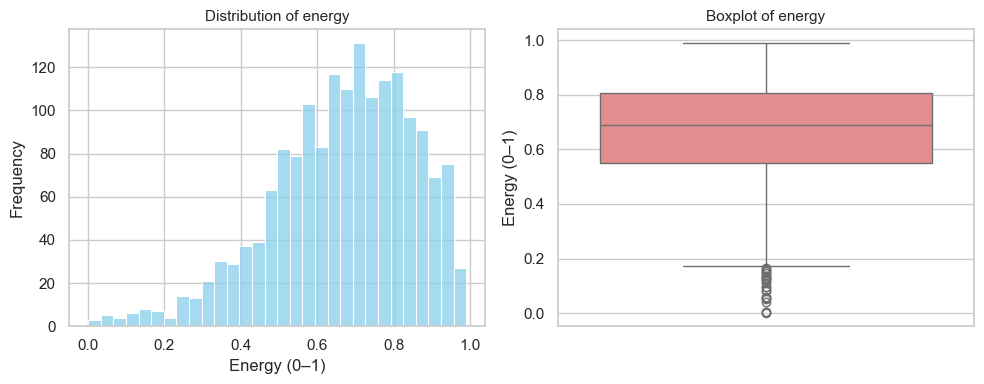

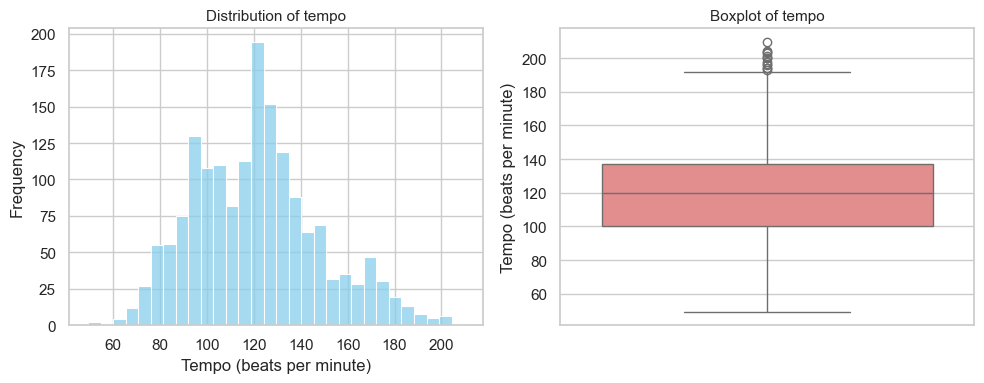

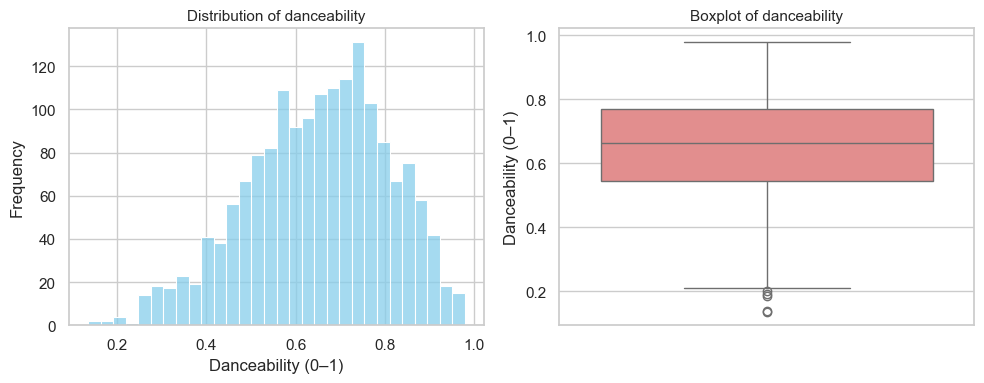

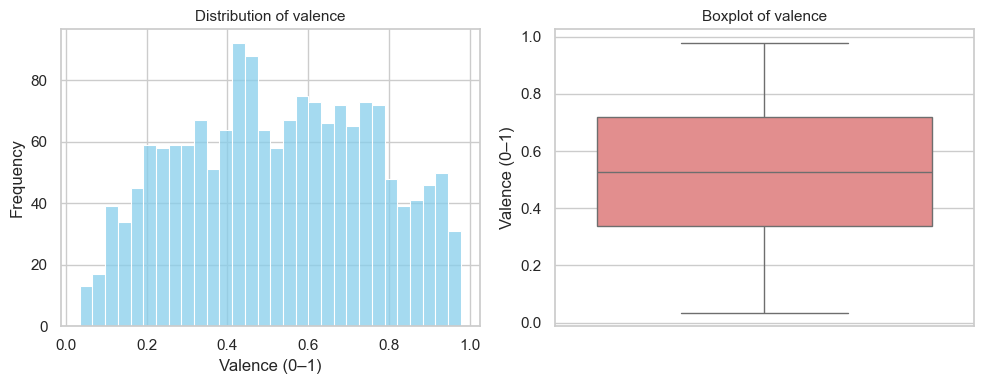

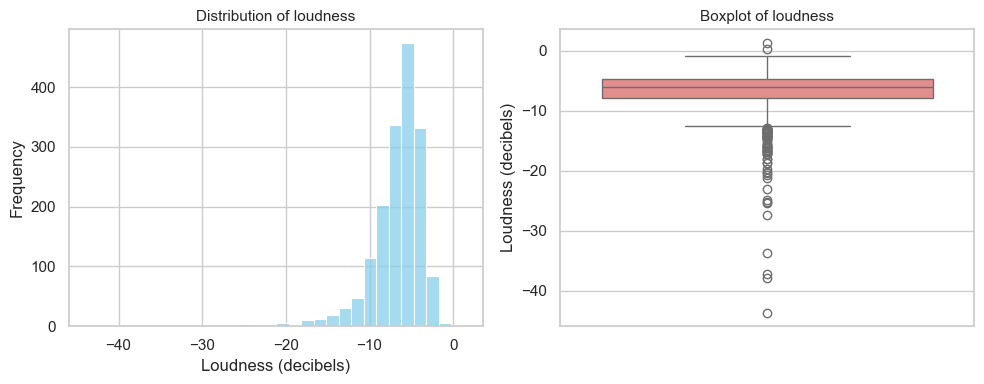

In [1128]:
feature_units = {
    "energy": "Energy (0–1)",
    "tempo": "Tempo (beats per minute)",
    "danceability": "Danceability (0–1)",
    "valence": "Valence (0–1)",
    "loudness": "Loudness (decibels)"
}

for col in available_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.histplot(df_encoded[col], bins=30, ax=axes[0], color="skyblue", edgecolor=None)
    axes[0].set_title(f"Distribution of {col}", fontsize=11)
    axes[0].set_xlabel(feature_units.get(col, col))
    axes[0].set_ylabel("Frequency")
    
    sns.boxplot(y=df_encoded[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f"Boxplot of {col}", fontsize=11)
    axes[1].set_ylabel(feature_units.get(col, col))
    
    plt.tight_layout()
    plt.show()

**Energy**:

The distribution of energy is moderately right-skewed, with most songs falling between 0.6 and 0.8. This indicates that the majority of tracks in the dataset are relatively high in perceived intensity and activity level. The boxplot reveals a few low-energy outliers (below 0.2), representing softer or more subdued tracks. Overall, the data suggest that high-energy compositions dominate the sample, which aligns with mainstream music trends where upbeat and dynamic songs tend to perform well.

**Tempo**:

The tempo variable exhibits an approximately normal distribution centered around 120 BPM, consistent with the rhythmic patterns of popular music genres such as pop and dance. The range extends from roughly 60 to 200 BPM, with a concentration of values between 100 and 140 BPM. The boxplot indicates a small number of high-tempo outliers (>180 BPM), which may correspond to remixes or fast-paced electronic tracks. The symmetry of the distribution suggests a balanced tempo representation within the dataset.

**Danceability**:

Danceability displays a slight right-skew, with most songs clustered between 0.5 and 0.8. This reflects that a large portion of tracks possess strong rhythmic elements, making them suitable for dancing. The presence of a few outliers below 0.3 represents tracks with more complex or irregular rhythms. Overall, the high concentration in the upper range supports the notion that mainstream tracks often prioritize rhythmic clarity and consistent beat structures

**Valence**: 

The valence variable, which quantifies the musical positivity or emotional brightness of a track, shows a nearly uniform distribution across its range. This implies a balanced mix of emotionally positive and negative songs, suggesting that the dataset captures a wide emotional spectrum. The boxplot supports this observation, showing no strong skewness or clustering, indicating that both upbeat and melancholic songs are equally represented.

**Loudness**:

Loudness is strongly left-skewed, with most values concentrated between –10 dB and 0 dB, typical of modern digital mastering where dynamic range is compressed for perceived loudness. Outliers in the lower range (below –20 dB) represent quieter or acoustic tracks. The boxplot indicates that the majority of songs maintain a consistently high loudness level, which reflects the “loudness normalization” trend prevalent in commercial music production.

**Summary**:

Collectively, the features indicate that the dataset is dominated by energetic, danceable, and loud tracks with tempos centered around 120 BPM, mirroring contemporary production and listener preferences. The variability in valence introduces emotional diversity, while observed outliers across several features demonstrate stylistic variety within the dataset.

## Correlation and Multivariate Analysis

In [1129]:
# --- 1) Select numerical columns including target variable ---
num_features = ["energy", "tempo", "danceability", "valence", "loudness", "track_popularity"]
available_features = [f for f in num_features if f in df_encoded.columns]

# --- 2) Compute correlation matrix ---
corr_matrix = df_encoded[available_features].corr(method='pearson')

print("Correlation Matrix")
corr_matrix.round(3)

Correlation Matrix


,energy,tempo,danceability,valence,loudness,track_popularity
energy,1.000,0.115,0.018,0.326,0.691,-0.007
tempo,0.115,1.000,-0.111,0.003,0.063,0.017
danceability,0.018,-0.111,1.000,0.347,0.213,-0.002
valence,0.326,0.003,0.347,1.000,0.234,-0.006
loudness,0.691,0.063,0.213,0.234,1.000,0.084
track_popularity,-0.007,0.017,-0.002,-0.006,0.084,1.000


From initial inspection, it seems that audio features exhibit low correlation. Let's dive deeper with some visualization for a better inspection

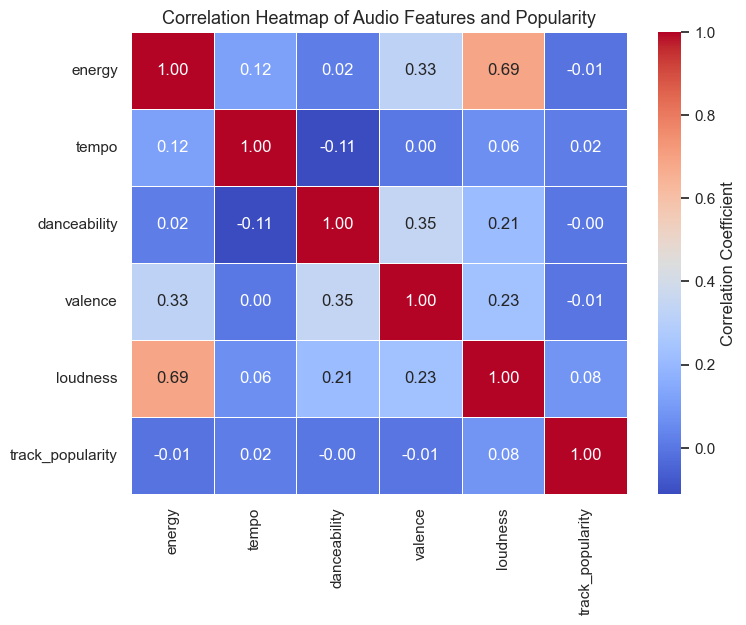

In [1130]:
# --- 3) Plot correlation heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Heatmap of Audio Features and Popularity", fontsize=13)
plt.show()

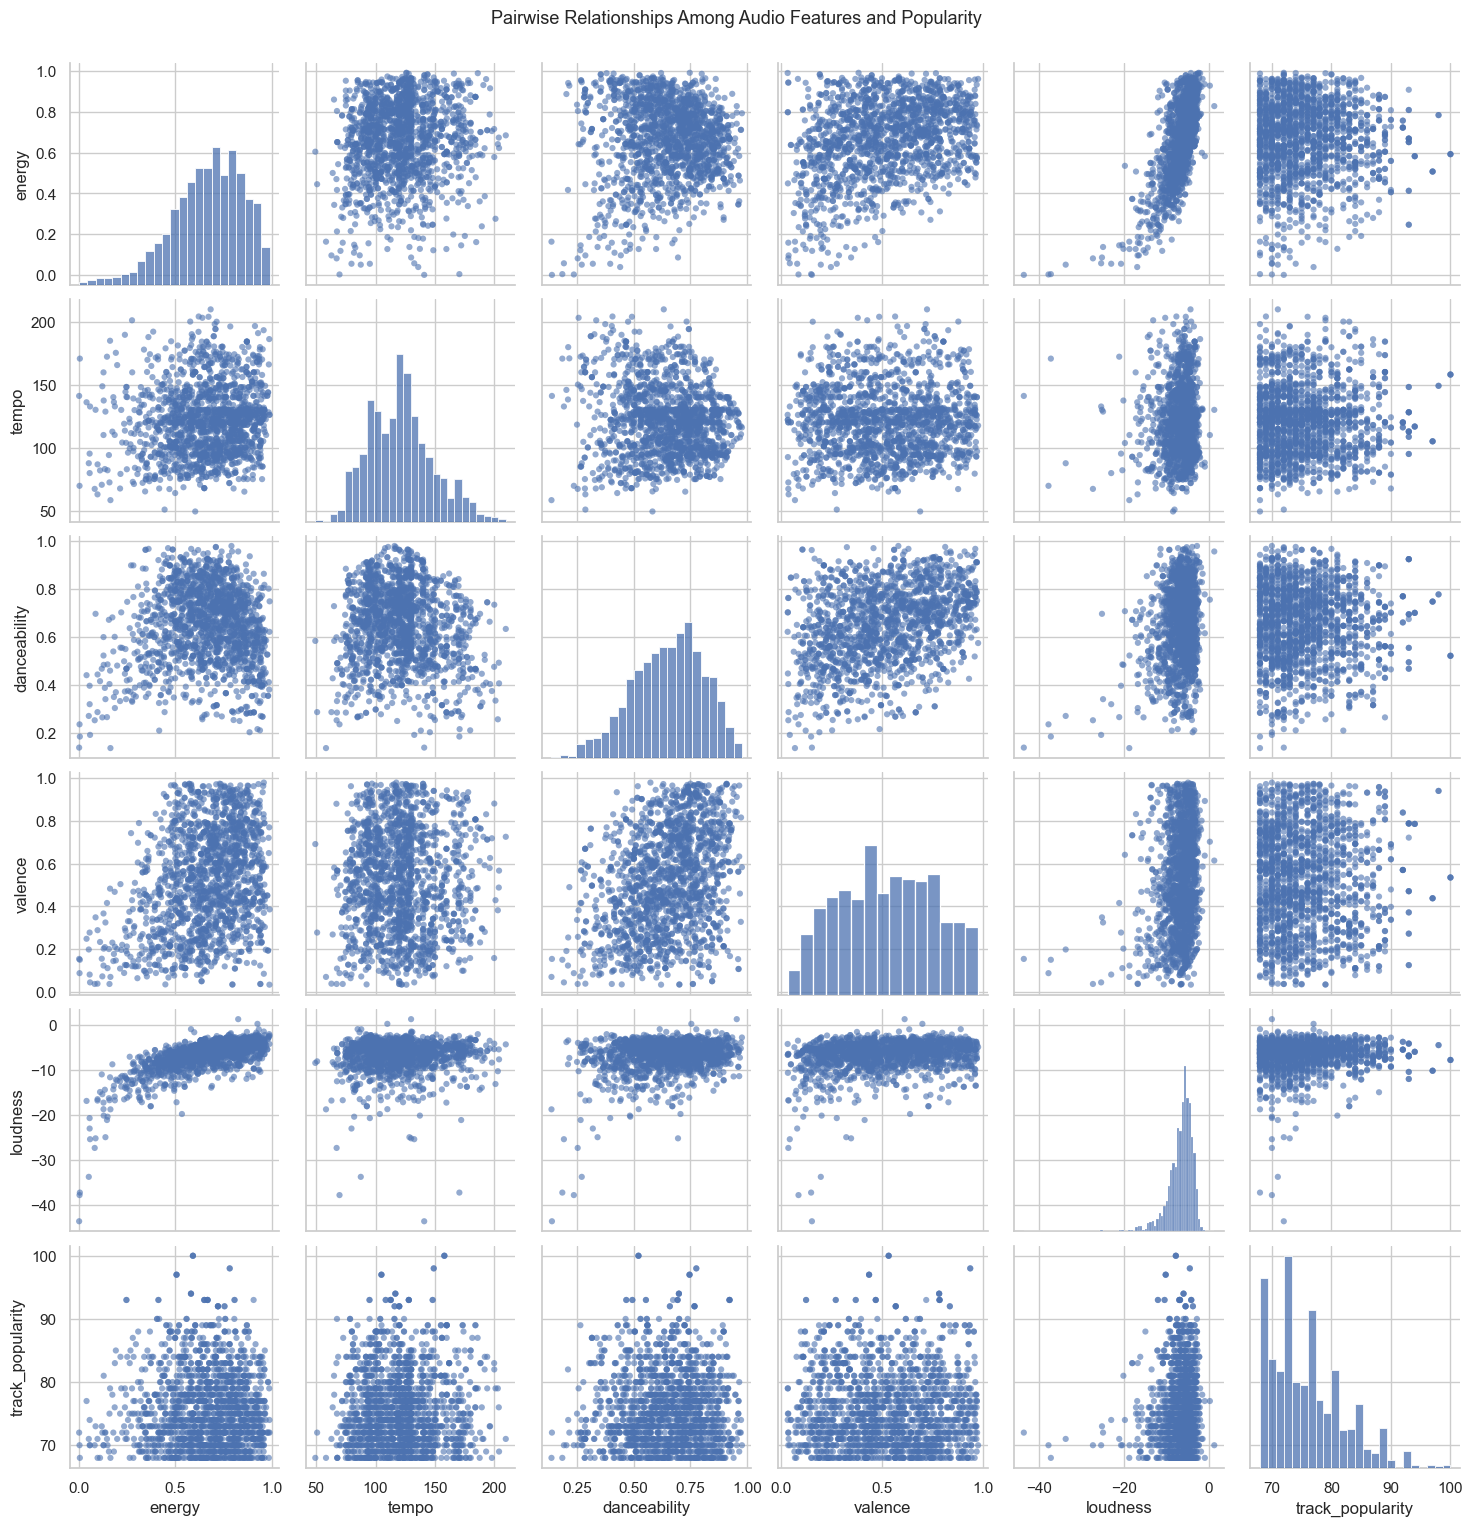

In [1131]:
# Select features for visualization
features = ["energy", "tempo", "danceability", "valence", "loudness", "track_popularity"]
available_features = [f for f in features if f in df_encoded.columns]

# --- Pairplot ---
sns.pairplot(
    df_encoded[available_features],
    plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'none'},
)

plt.suptitle("Pairwise Relationships Among Audio Features and Popularity", y=1.02, fontsize=13)
plt.show()

The correlation heatmap and pairplot provide a detailed view of how the numerical audio features relate to one another and to the target variable, track_popularity. Overall, the results indicate that while several audio features are interrelated, none of them exhibit a strong linear relationship with popularity.

- Energy and Loudness:
    - These two variables show the strongest positive correlation (r = 0.69). This relationship is expected, as louder tracks are often perceived as more energetic due to modern production techniques that emphasize intensity and compression.

- Danceability and Valence:
    - A moderate positive correlation (r = 0.35) is observed between these features, suggesting that more danceable songs tend to also convey positive emotions or moods.

- Energy and Valence:
    - A weak positive correlation (r = 0.33) indicates that high-energy songs are slightly more likely to have a cheerful or bright tone, although this trend is not very strong.

- Tempo and Other Features:
    - Tempo shows minimal correlation with other variables (|r| < 0.1), implying that the perceived speed of a track does not strongly affect other acoustic dimensions in this dataset.

- Popularity Relationships:
    - None of the audio features display a significant correlation with track_popularity (|r| < 0.1). This suggests that song popularity is not determined by basic acoustic features alone, but likely depends on additional contextual or external factors such as marketing exposure, artist recognition, playlist inclusion, or cultural trends.

## Categorical Feature Exploration

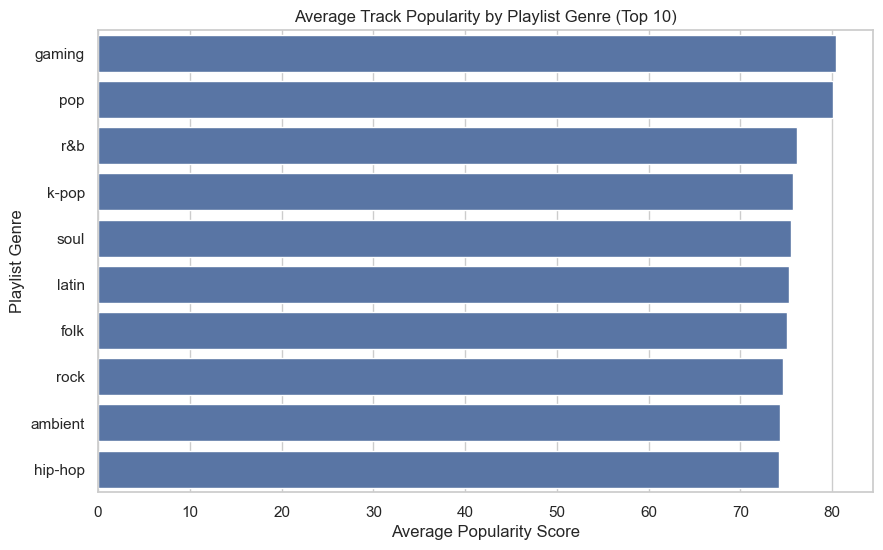

In [1132]:
# Use df_clean (the version with categorical columns intact)

# --- 1) Average popularity by genre ---
genre_popularity = (
    prepped_df.groupby("playlist_genre")["track_popularity"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="track_popularity",
    y="playlist_genre",
    data=genre_popularity
)
plt.title("Average Track Popularity by Playlist Genre (Top 10)")
plt.xlabel("Average Popularity Score")
plt.ylabel("Playlist Genre")
plt.show()

The average popularity chart shows that gaming and pop playlists lead with the highest mean popularity scores, suggesting that songs featured in these playlists tend to achieve broader reach.

Genres such as R&B, K-pop, soul, and latin also maintain relatively high popularity levels.

Overall, the results imply that playlist context plays a key role in a song’s exposure and streaming success. Songs classified under mainstream or playlist-driven genres tend to receive higher popularity scores, likely due to increased discoverability on popular Spotify playlists.

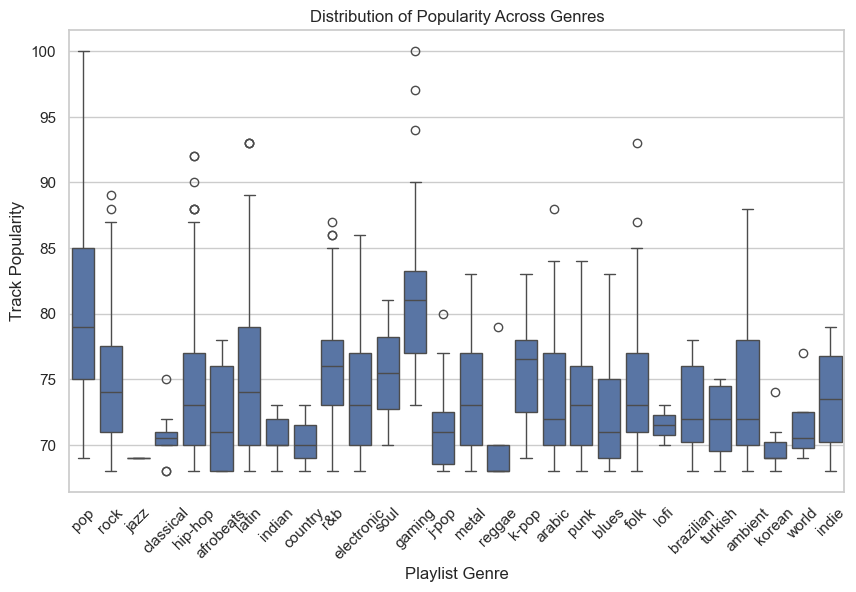

In [1133]:
# --- 2) Popularity distribution by genre (boxplot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="playlist_genre",
    y="track_popularity",
    data=prepped_df
)
plt.xticks(rotation=45)
plt.title("Distribution of Popularity Across Genres")
plt.xlabel("Playlist Genre")
plt.ylabel("Track Popularity")
plt.show()

The boxplot distribution highlights substantial variability within genres like pop and hip-hop, indicating that while these categories contain many high-performing tracks, they also include less popular ones. Conversely, genres such as classical and jazz show narrower distributions, with most tracks achieving lower but more consistent popularity levels.

This variation suggests that mainstream genres exhibit greater diversity in audience reach, while niche genres attract smaller but more stable listener bases.

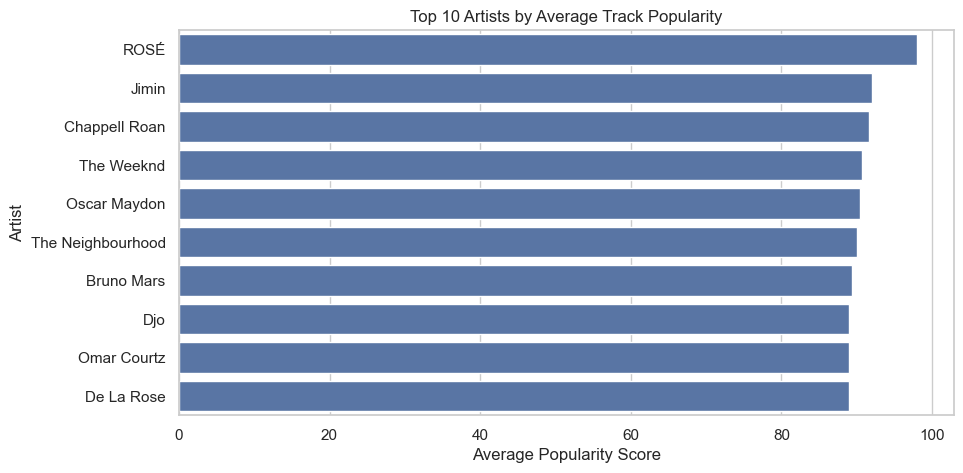

In [1134]:
# Identify all artists
artist_cols = [col for col in df_encoded.columns if col.startswith("track_artist_")]

# average popularity for each artist
artist_popularity = {
    col.replace("track_artist_", ""): df_encoded.loc[df_encoded[col] == 1, "track_popularity"].mean()
    for col in artist_cols
}

# convert to DataFrame and sort top 10
artist_popularity_df = (
    pd.DataFrame(list(artist_popularity.items()), columns=["Artist", "Average_Popularity"])
    .sort_values("Average_Popularity", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Average_Popularity",
    y="Artist",
    data=artist_popularity_df
)
plt.title("Top 10 Artists by Average Track Popularity")
plt.xlabel("Average Popularity Score")
plt.ylabel("Artist")
plt.show()

The top 10 artists by average popularity include globally recognized performers such as ROSÉ, Jimin, The Weeknd, and Bruno Mars, all of whom consistently achieve extremely high average popularity scores (above 90).
	
This pattern underscores the strong impact of artist reputation and fanbase size on popularity metrics.
	
Emerging or niche artists may still achieve high popularity when featured alongside well-known performers or through viral success, but overall, established artists dominate the top range.

### Correlation Analysis

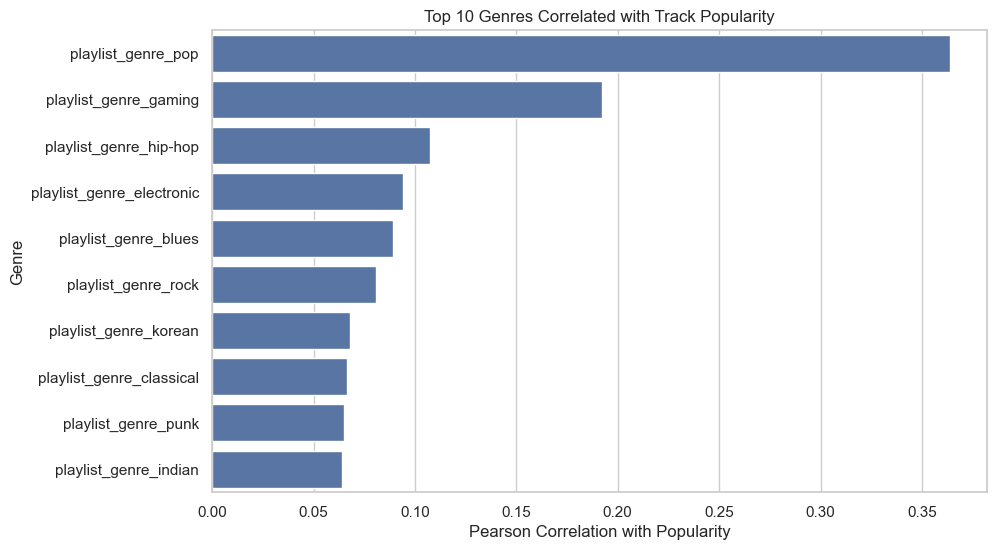

In [1135]:
genre_cols = [col for col in df_encoded.columns if col.startswith("playlist_genre_")]
artist_cols = [col for col in df_encoded.columns if col.startswith("track_artist_")]

genre_corr = df_encoded[genre_cols + ["track_popularity"]].corr()["track_popularity"].sort_values(ascending=False)
artist_corr = df_encoded[artist_cols + ["track_popularity"]].corr()["track_popularity"].sort_values(ascending=False)

genre_corr_abs = genre_corr.abs().sort_values(ascending=False)
artist_corr_abs = artist_corr.abs().sort_values(ascending=False)

genre_corr_df = genre_corr_abs.drop("track_popularity").reset_index()
genre_corr_df.columns = ["Genre", "Correlation"]

artist_corr_df = artist_corr_abs.drop("track_popularity").reset_index()
artist_corr_df.columns = ["Artist", "Correlation"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Correlation", y="Genre", data=genre_corr_df.head(10))
plt.title("Top 10 Genres Correlated with Track Popularity")
plt.xlabel("Pearson Correlation with Popularity")
plt.ylabel("Genre")
plt.show()

- Pop shows the strongest positive correlation with popularity (r = 0.36), indicating that tracks classified under pop playlists are most likely to achieve high listener engagement and streaming performance.
- Gaming and hip-hop genres also display notable positive correlations (r = 0.18–0.12), suggesting these playlists provide strong exposure for featured songs, possibly due to their frequent inclusion in user-curated or algorithmic playlists with large audiences.
- Other genres, including electronic, blues, and rock, exhibit smaller positive correlations (r = 0.07–0.10), showing moderate association with popularity.
- The weak correlations for genres like classical, punk, and indian (r < 0.08) indicate niche listener bases and lower general exposure.

Overall, the correlation pattern suggests that mainstream and playlist-driven genres (pop, hip-hop, gaming) are significantly more associated with track popularity than niche or culturally specific genres. While correlations remain modest in absolute terms, their consistency across mainstream categories highlights genre as a key contextual factor influencing popularity.

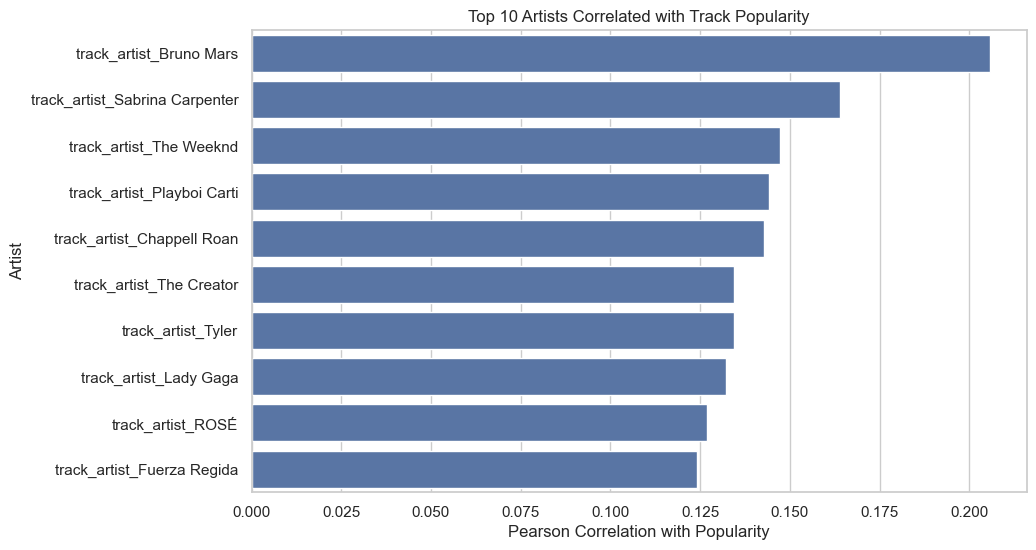

In [1136]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Correlation", y="Artist", data=artist_corr_df.head(10))
plt.title("Top 10 Artists Correlated with Track Popularity")
plt.xlabel("Pearson Correlation with Popularity")
plt.ylabel("Artist")
plt.show()

- Bruno Mars shows the highest correlation with track popularity (r = 0.20), followed closely by Sabrina Carpenter, The Weeknd, and Playboi Carti. These correlations reflect their widespread recognition, active presence on global charts, and extensive streaming reach.
- Artists such as Chappell Roan, ROSÉ, and Lady Gaga also show positive associations with popularity (r = 0.12–0.15), demonstrating consistent engagement among dedicated fanbases and frequent playlist placement.
- The correlations, while moderate, confirm that artist identity plays a significant role in determining a track’s commercial reach — often more so than acoustic or technical features.

Taken together, these results indicate that mainstream genres and well-established artists consistently align with higher popularity metrics. Although the correlation coefficients are not strong in a statistical sense, they reveal meaningful real-world trends: tracks by globally recognized artists and within popular genres are more likely to attract sustained listener attention and algorithmic visibility.


## Key Findings and Insights

The exploratory data analysis reveals several patterns linking audio, contextual, and categorical factors to track popularity. While popularity is influenced by multiple dimensions, both intrinsic musical qualities and external exposure factors play significant roles.

1. Audio Features
	-   Energy and loudness are strongly correlated (r = 0.69), indicating that louder tracks tend to be perceived as more energetic.
	-   However, no individual audio feature such as energy, danceability, valence, or tempo shows a strong linear relationship with track_popularity (|r| < 0.1).
	-   This suggests that sonic characteristics alone do not fully determine a song’s commercial success. Popularity likely depends more on external factors such as artist recognition and playlist exposure.

2. Categorical Attributes
	-   Genre demonstrates a clearer connection with popularity. Mainstream genres such as pop, gaming, and hip-hop exhibit the strongest positive correlations (r = 0.18–0.36), indicating that songs within these categories are more likely to achieve widespread streaming success.
	-   In contrast, niche genres like folk, ambient, and classical show weaker associations, reflecting smaller and more specialized audiences.

3. Artist Influence
	-   Prominent artists, including Bruno Mars, The Weeknd, and Sabrina Carpenter, show the highest positive correlations with popularity (r = 0.15–0.20).
	-   These findings reinforce that artist reputation and visibility are major drivers of track popularity likely linked to fanbase size, social media presence, and playlist placements.

4. General Insights
	-   Popularity distribution is right-skewed: most songs achieve moderate popularity, while only a small fraction attain very high scores (80+).
	-   Multicollinearity exists among several audio features (notably between energy and loudness), indicating that future predictive models should account for redundant information.
	-   Contextual factors (artist and genre) exhibit stronger correlations with popularity than intrinsic acoustic attributes, emphasizing the importance of exposure and branding in modern music success.

While musical qualities like energy, tempo, and danceability influence listener perception, they do not directly predict popularity. Instead, genre affiliation and artist identity emerge as key contextual drivers of success, highlighting the critical role of playlist curation, audience targeting, and artist reach in shaping streaming performance.

## Hypothesis Formulation

The following hypotheses are developed from exploratory findings regarding how musical, contextual, and categorical factors may influence track popularity.

- **Hypothesis 1**: Relationship between Energy and Popularity
    - H0: There is no significant relationship between a track’s energy level and its popularity score.
	- H1: Tracks with higher energy levels tend to achieve higher popularity scores.

- **Hypothesis 2**: Influence of Playlist Genre on Popularity
    - H0: Track popularity does not significantly differ across playlist genres
	- H1: Track popularity significantly differs among playlist genres, with mainstream genres (e.g., pop, hip-hop) achieving higher scores.

- **Hypothesis 3**: Influence of Playlist Genre on Popularity
    - H0: There is no difference in average popularity between tracks by highly recognized artists and those by lesser-known artists
	- H1: Tracks by highly recognized artists achieve higher average popularity scores than those by lesser-known artists.



## Hypothesis Testing and Significance Analysis

### Hypothesis 1

In [1137]:
# In this example, we will show how to prove (or disprove), with statistical evidence,
# that a track's ENERGY level is linearly associated with its POPULARITY score.

energy = prepped_df["energy"].astype(float)
popularity = prepped_df["track_popularity"].astype(float)

print("Mean ENERGY:", round(energy.mean(), 2))
print("Mean POPULARITY:", round(popularity.mean(), 2))

alpha = 0.05

r_value, p_value = stats.pearsonr(energy, popularity)
print("r_value =", round(r_value, 4), ", p_value =", round(p_value, 6))

if p_value < alpha:
    print(f"Conclusion: since p_value {p_value:.6f} is less than alpha {alpha},")
    print("Reject the null hypothesis — ENERGY is significantly correlated with POPULARITY.")
    if r_value > 0:
        print("Interpretation: Higher-energy songs tend to be more popular.")
    else:
        print("Interpretation: Higher-energy songs tend to be less popular.")
else:
    print(f"Conclusion: since p_value {p_value:.6f} is greater than alpha {alpha},")
    print("Fail to reject the null hypothesis — no significant linear relationship between ENERGY and POPULARITY.")

Mean ENERGY: 0.67
Mean POPULARITY: 75.81
r_value = -0.0072 , p_value = 0.769184
Conclusion: since p_value 0.769184 is greater than alpha 0.05,
Fail to reject the null hypothesis — no significant linear relationship between ENERGY and POPULARITY.


At a 95% confidence level (alpha = 0.05), the p-value (0.769) is greater than alpha, indicating no statistically significant correlation between energy and popularity.

### Hypothesis 2

In [1138]:
# In this example, we will show how to prove (or disprove), with statistical evidence,
# that the mean track popularity of Pop songs is different from that of Hip-hop songs.

# --- Separate the two genre groups ---
pop = prepped_df.loc[prepped_df["playlist_genre"] == "pop"]
hiphop = prepped_df.loc[prepped_df["playlist_genre"] == "hip-hop"]

# --- Extract their popularity values ---
pop_popularity = pop.track_popularity
hiphop_popularity = hiphop.track_popularity

# --- Compute group means ---
print("Mean popularity (Pop):", round(pop_popularity.mean(), 2))
print("Mean popularity (Hip-hop):", round(hiphop_popularity.mean(), 2))

# --- Define significance level ---
alpha = 0.05

# --- Perform independent two-sample t-test ---
t_value, p_value = stats.ttest_ind(pop_popularity, hiphop_popularity)
print("t_value =", round(t_value, 4), ", p_value =", round(p_value, 4))

# --- Conclusion based on p-value ---
if p_value < alpha:
    print(f"Conclusion: since p_value {p_value:.4f} is less than alpha {alpha},")
    print("Reject the null hypothesis — there is a significant difference in mean popularity between Pop and Hip-hop tracks.")
else:
    print(f"Conclusion: since p_value {p_value:.4f} is greater than alpha {alpha},")
    print("Fail to reject the null hypothesis — there is no significant difference in mean popularity between Pop and Hip-hop tracks.")

Mean popularity (Pop): 80.04
Mean popularity (Hip-hop): 74.16
t_value = 11.1958 , p_value = 0.0
Conclusion: since p_value 0.0000 is less than alpha 0.05,
Reject the null hypothesis — there is a significant difference in mean popularity between Pop and Hip-hop tracks.


This means the difference in means (approx. 6 points) is highly statistically significant. Far too large to have arisen by chance given your sample size.

### Hypothesis 3

In [1139]:
# In this example, we will show how to prove (or disprove), with statistical evidence,
# that tracks by HIGHLY RECOGNIZED ARTISTS achieve higher average POPULARITY scores
# than tracks by LESSER-KNOWN ARTISTS.

# --- Define a threshold for 'highly recognized' artists ---
# (For example, artists with at least 10 tracks in the dataset)
artist_counts = prepped_df["track_artist"].value_counts()
high_recognized = set(artist_counts[artist_counts >= 10].index)

# --- Split data into two groups ---
high_rec_artists = prepped_df.loc[prepped_df["track_artist"].isin(high_recognized), "track_popularity"].dropna().astype(float)
low_rec_artists  = prepped_df.loc[~prepped_df["track_artist"].isin(high_recognized), "track_popularity"].dropna().astype(float)

print("Mean POPULARITY (Highly Recognized Artists):", round(high_rec_artists.mean(), 2))
print("Mean POPULARITY (Lesser-Known Artists):", round(low_rec_artists.mean(), 2))

t_value, p_value = stats.ttest_ind(high_rec_artists, low_rec_artists)
print("t_value =", round(t_value, 4), ", p_value =", round(p_value, 6))

# --- Conclusion based on p-value ---
if p_value < alpha:
    print(f"Conclusion: since p_value {p_value:.6f} is less than alpha {alpha},")
    print("Reject the null hypothesis — tracks by highly recognized artists have significantly higher average popularity.")
else:
    print(f"Conclusion: since p_value {p_value:.6f} is greater than alpha {alpha},")
    print("Fail to reject the null hypothesis — no significant difference in average popularity between highly recognized and lesser-known artists.")

Mean POPULARITY (Highly Recognized Artists): 79.2
Mean POPULARITY (Lesser-Known Artists): 75.65
t_value = 5.048 , p_value = 0.0
Conclusion: since p_value 0.000000 is less than alpha 0.05,
Reject the null hypothesis — tracks by highly recognized artists have significantly higher average popularity.


There is strong statistical evidence that tracks by highly recognized artists have significantly higher average popularity than those by lesser-known artists.

This indicates that artist reputation and visibility play an important role in determining a track’s success on Spotify.

### Overall Insights

The hypothesis testing results confirm that contextual and categorical attributes such as playlist genre and artist recognition have significant effects on track popularity, whereas audio intensity (energy) does not.

This supports the broader conclusion that popularity on Spotify is shaped more by exposure, branding, and audience context than by intrinsic musical features.

## Conclusion and Next Steps

The results of the exploratory and inferential analyses reveal clear distinctions in how different musical and contextual features influence track popularity.
While intrinsic audio properties such as energy show no significant correlation with popularity, categorical and contextual factors specifically playlist genre and artist recognition demonstrate statistically significant effects.

These findings suggest that a track’s success on Spotify depends more on exposure, audience context, and artist prominence than on raw acoustic characteristics.

Statistically significant features identified through hypothesis testing (e.g., playlist genre and artist recognition) will be prioritized as potential predictors in the subsequent modeling and forecasting phase. Future stages of the project will focus on:
- Developing predictive models (e.g., regression or ensemble methods) to forecast track popularity.
- Evaluating the relative importance of contextual vs. audio features using feature importance metrics or SHAP analysis.
- Testing model generalization on unseen datasets to validate robustness.

Together, these steps will form the foundation for the project’s analytical conclusions and practical recommendations for improving music visibility and audience engagement on Spotify.
